# Kodutöö 1
- Jupyter Notebooki kasutamine
- Pakett Pandas tutvustus
- Kuidas andmeid kätte saada

## Jupyter notebook
Jupyter notebookis (erinevalt varasematest rakendustest nagu IDLE ja Thonny) saame jooksutada mitut koodi järjest ning jätta meelde vanad muutujad.


See tuleb kasuks siis, kui meie kood võtab palju aega või on lihtsalt mitmest etapist koosnev.


In [1]:
# Näide 1

a = "Mari"

a #Viimasel real olev muutuja prinditakse automaatselt välja ka ilma print käsuta


'Mari'

In [2]:
print("Tere,",a) #Paneme tähele, et muutuja a on meil defineeritud eelnevas koodiblokis



Tere, Mari


## Andmete kättesaamine Pandasega

In [4]:
import pandas as pd  #impordime mooduli

andmed = pd.read_csv("abalone.csv") #laeme alla andmed csv-st, mille nimi on abalone
andmed

,Gender,Length,Diameter,Height,Weight,Rings
0,F,0.505,0.385,0.135,0.6185,12
1,F,0.650,0.475,0.165,1.3875,9
2,I,0.520,0.380,0.135,0.5395,8
3,F,0.550,0.425,0.140,0.9520,7
4,M,0.640,0.525,0.180,1.3135,10
...,...,...,...,...,...,...
995,I,0.550,0.415,0.135,0.8095,12
996,I,0.455,0.435,0.110,0.4265,8
997,M,0.660,0.500,0.165,1.3195,9
998,I,0.525,0.400,0.130,0.6455,8


Järgmiseks tutvume põhiliste pandas paketi käskudega. Selle jaoks on meil abiks järgmised lehed:
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

Uurime käesolevat andmestiku. Alustame kõige olulisemast:
1) Prindime välja päiste (columns) nimed
2) Vaatame, mitu rida meil on andmestikus

In [5]:
# ÜLESANNE: prindi välja for-tsükliga columnite nimed
for rida in andmed:
    print(rida)



Gender
Length
Diameter
Height
Weight
Rings


In [27]:
# ÜLESANNE: kirjuta kood, mis prindib välja andmetabeli ridade arvu
print(andmed.shape[0])

1000


In [32]:
#Prindi välja 6 esimest rida. Milline on nende kuue esimese rea kirjete maksimaalne ringi diameeter?
#(suurimat diameetrit võid vaadata silmaga ja kirjutada alla kommentaarina)

print(andmed[0:6])
#Suurim diameeter on 0.525 lol

  Gender  Length  Diameter  Height  Weight  Rings
0      F   0.505     0.385   0.135  0.6185     12
1      F   0.650     0.475   0.165  1.3875      9
2      I   0.520     0.380   0.135  0.5395      8
3      F   0.550     0.425   0.140  0.9520      7
4      M   0.640     0.525   0.180  1.3135     10
5      I   0.520     0.380   0.125  0.5545      8


In [54]:
#Prindi välja 2 viimast rida andmestikus.
print(andmed[-2::])

    Gender  Length  Diameter  Height  Weight  Rings
998      I   0.525     0.400   0.130  0.6455      8
999      M   0.515     0.395   0.135  1.0070      8


In [65]:
# Mis on jõekarbi pikkus, mis asub real 388?
andmed.iloc[[388],[1]]

,Length
388,0.64


In [92]:
#Mis on karbi keskmine ringide arv (kasuta käsku describe())
andmed.describe()["Rings"]["mean"]

11.318

In [104]:
# Koosta alamandmestik, kus gender = "F" ja Diameter >=0.4. 
#Mitu sellist rida said? 
#Mis on nende karpide keskmi[ne pikkus?
print(andmed[(andmed.Gender=="F")&(andmed.Diameter>=0.4)].describe()["Rings"]["count"])
print(andmed[(andmed.Gender=="F")&(andmed.Diameter>=0.4)].describe()["Rings"]["mean"])





241.0
11.493775933609959


In [ ]:
# Mis on minimaalne pikkus, kui ringide arv on 18?


In [120]:
#Prindi välja keskmine karpide kaal, mille ringide arv on võrdne kaheksaga. 
andmed[andmed["Rings"]==8].describe()["Weight"]["mean"]

#Prindi välja keskmine karpide kaal IGA ringi puhul (kasuta for-tsüklit)
#väljaprint peab olema ringide arvu järgi kasvav (alguses need karbid, mille ringidearv on 1, siis 2 jne)
ringe = andmed["Rings"].unique()
ringe.sort()
kaalud = []
for x in ringe:
    andmed2 = andmed[andmed["Rings"]==x]
    kaal = andmed2.describe()["Weight"]["mean"]
    print("Rings: ",x, "Weight: ", round(kaal,4))
    kaalud.append(kaal)
    


Rings:  1 Weight:  0.002
Rings:  3 Weight:  0.0245
Rings:  4 Weight:  0.055
Rings:  5 Weight:  0.1326
Rings:  6 Weight:  0.2669
Rings:  7 Weight:  0.4165
Rings:  8 Weight:  0.6335
Rings:  9 Weight:  0.8492
Rings:  10 Weight:  1.0188
Rings:  11 Weight:  1.1451
Rings:  12 Weight:  1.0515
Rings:  13 Weight:  1.0981
Rings:  14 Weight:  1.2616
Rings:  15 Weight:  1.0739
Rings:  16 Weight:  1.1644
Rings:  17 Weight:  1.2745
Rings:  18 Weight:  1.0766
Rings:  19 Weight:  1.0947
Rings:  20 Weight:  1.1023
Rings:  21 Weight:  1.676
Rings:  22 Weight:  1.157
Rings:  23 Weight:  1.0432
Rings:  27 Weight:  1.2125
Rings:  1500 Weight:  0.8025


#Vaata väljaprinti - kas karpide kaal sõltub ringide arvust?
#Vastus: Jah, madalamate arvude juures eksponentsiaalselt, kuid suuremate ringide arvu juures kaob selge korrelatsioon andmete vahel ära.
 

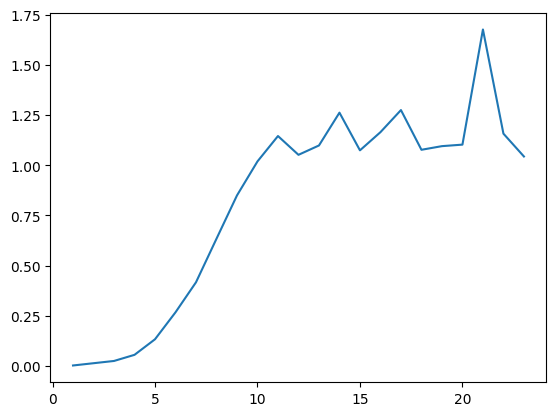

In [122]:
#LISAÜLESANNE: Tee graafik, kus x-teljel on karbi ringide arv ja y-teljel vastav keskmine kaal. 
import matplotlib.pyplot as plt
plt.plot(ringe[:-2],kaalud[:-2])
